In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.shape

(1599, 12)

In [7]:
quality = {3:"bad",4:"bad",5:"bad",6:"good",7:"good",8:"good"}
df['quality'] = df['quality'].map(quality)

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [9]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df['quality'] = lc.fit_transform(df['quality'])

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [11]:
x = df.drop('quality', axis=1)
y = df['quality']

In [12]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [13]:
scaled_x = pd.DataFrame(x,columns=df.columns[:-1])

In [14]:
scaled_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


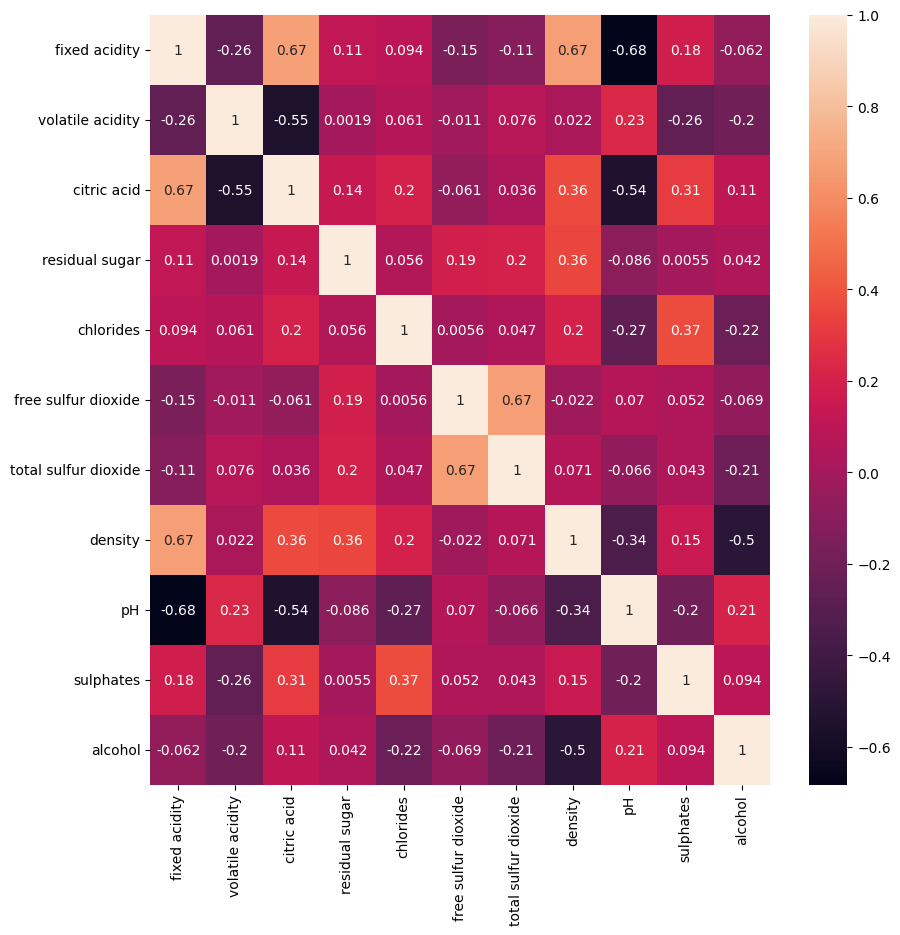

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = scaled_x.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr,annot=True)
plt.show()

In [16]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size=0.3,random_state=42)

In [17]:
x_train.shape

(1119, 11)

In [23]:
# model = Sequential(
#     [
#         tf.keras.Input(shape=(11,)),
#         Dense(256,activation='relu',name='l1'),
#         Dense(128,activation='relu',name='l2'),
#         Dense(64,activation='relu',name='l3'),
#         Dense(32,activation='relu',name='l4'),
#         Dense(1,activation='linear',name='l5')
#     ],name="my_model"
# )

def class_model():
  model = Sequential()
  model.add(Dense(256, activation='relu', input_shape=(11,)))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  return model

model = class_model()

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 46337 (181.00 KB)
Trainable params: 46337 (181.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# model.compile(
#     optimizer = tf.keras.optimizers.Adam(0.001),
#     loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
#     metrics = ['accuracy']
# )

# model.fit(x_train,y_train,epochs=100)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
35/35 [==============================] - 1s 2ms/step - loss: 0.5825 - accuracy: 0.6971
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 0.5202 - accuracy: 0.7551
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.7668
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4805 - accuracy: 0.7793
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4679 - accuracy: 0.7873
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.8034
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4378 - accuracy: 0.8070
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.8052
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.8213
Epoch 10/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4052 - accuracy: 0.8195
Epoch 11/

In [26]:
score = model.evaluate(x_test,y_test)
print(f'Final Accuracy: {score[1] * 100:.2f}%')

15/15 [==============================] - 0s 2ms/step - loss: 1.5667 - accuracy: 0.7875
Final Accuracy: 78.75%


In [27]:
new_data = pd.DataFrame({
    "fixed acidity": [7.4],
    "volatile acidity": [0.70],
    "citric acid": [0.00],
    "residual sugar": [1.9],
    "chlorides": [0.076],
    "free sulfur dioxide": [11],
    "total sulfur dioxide": [34],
    "density": [0.9978],
    "pH": [3.51],
    "sulphates": [0.56],
    "alcohol": [9.4]
})

# Assume `sc` is your trained StandardScaler and `model` is your trained classification model
# Example: sc = StandardScaler().fit(X_train) and model = LogisticRegression().fit(X_train_scaled, y_train)

# Preprocess the new input data
X_new = sc.transform(new_data)

# Make predictions on the new data
new_predictions = model.predict(X_new)

# Convert probabilities to class labels (0 or 1)
new_predicted_classes = (new_predictions > 0.5).astype(int)

# Print the predictions for the new data
print("Predicted classes for new data:")
print(new_predicted_classes)

1/1 [==============================] - 0s 67ms/step
Predicted classes for new data:
[[0]]
